In [0]:
import tensorflow as tf
import random
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
!python "/content/drive/My Drive/Colab Notebooks/Cycle/cycle-gan.py" --task butterfly --image_size 256

INFO:cycle-gan:Read data:
Check data /content/drive/My Drive/Colab Notebooks/Cycle/datasets/butterfly_edge_reverse
Load data butterfly_edge_reverse
/content/drive/My Drive/Colab Notebooks/Cycle/datasets/butterfly_edge_reverse/trainA_256.hy
/content/drive/My Drive/Colab Notebooks/Cycle/datasets/butterfly_edge_reverse/trainB_256.hy
/content/drive/My Drive/Colab Notebooks/Cycle/datasets/butterfly_edge_reverse/testA_256.hy
/content/drive/My Drive/Colab Notebooks/Cycle/datasets/butterfly_edge_reverse/testB_256.hy
INFO:cycle-gan:Build graph:

For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Please switch to tf.train.get_or_create_global_step
Instructions for updating:
Please switch to tf.train.get_or_create_global_step
Instructions for updating:
Colocations handled automatically by 

In [10]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
def make_square(image):
    height, width = image.shape[0], image.shape[1]
    size = max(height, width)
    top = bottom = int((size - height) / 2)
    left = right = int((size - width) / 2)
    new_image = cv2.copyMakeBorder(image, top, bottom, left, right, cv2.BORDER_CONSTANT, value = [255, 255, 255])
    return new_image

(256, 256, 3)


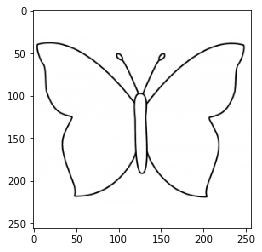

In [12]:
path = '/content/drive/My Drive/Colab Notebooks/butterfly'
path_output = '/content/drive/My Drive/Colab Notebooks/Cycle/datasets/butterfly_test/testA'
image_input = cv2.imread(path + "/" + 'exp1.png', cv2.IMREAD_UNCHANGED)
plt.imshow(image_input)
image_input = make_square(image_input)
image_input = cv2.resize(image_input, (256, 256))
image_input = np.array(np.asarray(image_input))
image_input = image_input[:, :, 0:3]
cv2.imwrite(path_output + "/" + 'exp1.png', image_input)
print(image_input.shape)
plt.imshow(image_input)

In [14]:
!python "/content/drive/My Drive/Colab Notebooks/Cycle/cycle-gan.py" --task butterfly_test --image_size 256 --load_model butterfly_2019-05-08_03-26-37-666

INFO:cycle-gan:Read data:
Check data /content/drive/My Drive/Colab Notebooks/Cycle/datasets/butterfly_test
Load data butterfly_test
/content/drive/My Drive/Colab Notebooks/Cycle/datasets/butterfly_test/trainA_256.hy
/content/drive/My Drive/Colab Notebooks/Cycle/datasets/butterfly_test/trainB_256.hy
/content/drive/My Drive/Colab Notebooks/Cycle/datasets/butterfly_test/testA_256.hy
/content/drive/My Drive/Colab Notebooks/Cycle/datasets/butterfly_test/testB_256.hy
INFO:cycle-gan:Build graph:

For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Please switch to tf.train.get_or_create_global_step
Instructions for updating:
Please switch to tf.train.get_or_create_global_step
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Colocations h